<a href="https://colab.research.google.com/github/NchangFor/dataanalytics-prework/blob/main/Carine_Intro_to_Analytical_Thinking_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project - Intro to Analytical Thinking

--- 
## The description:
We will go back to the Berlin rental prices dataset, this time we will ask you to answer broader questions and come to a conclusion based on your analysis.

Apply the methodology you learned today to answer the following questions. On top of writing the code, we will ask you to be explicit about your analytical approach.

Suppose you are an analytics consultant and your client is the Senate of Berlin, looking to draft policy suggestions to help make rent more accessible in the city. 

While they have not (yet) asked you for a recommendation, they need to understand the market's current state.

For that, you are asked:

1. Is there a shortage of *affordable* appartments in Berlin as a whole, or is the issue concentrated in select neighbourhoods? (hint: you will need to define "affordable" based on some criteria)

1. A few companies are exploring *Apartment renovation* as a viable business model — what impact could this practice have in the availability of *affordable* apartments?


--- 
## The dataset:
Y'all know this one already but to recap, this is a list of rental appartments in Berlin. One row is for one appartment. The dataset contains 6 columns. 
- Region: is the Berlin district, where the flat is located
- Condition: is the condition of the flat
- Rooms: The number of rooms the flat has
- Rent: Monthly rent for the flat
- Year_Construction: The year in which the house was build
- Space: How many square meters does the flat has?

As you delve on this analysis please remember that this is a scraped **snapshot** of the marketplace (there's no time dimension in this dataset).

--- 
## The Task:

For each of the questions:
- Define all the terms in the question that seem ambiguous — teachers should be able to help you with answers or assumptions
- Break down the question into smaller questions that can be answered with an analysis as we have studied
- Build a few plots or other types of analyses to answer the questions
- (Nice to have) Explore any source of variability that your current analysis may not cover and note any additional analyses you would like to do if you had more data
- Write as a conclusion an answer to the question

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from scipy import stats
import statsmodels.api as sm



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Get the dataset
df = pd.read_csv('https://raw.githubusercontent.com/juliandnl/redi_ss20/master/berlin_rental.csv')
df.head()

,Region,Condition,Rooms,Rent,Year_Construction,Space
0,Mitte,first_time_use,4.0,2659.00,2019,117.20
1,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33
2,Köpenick,well_kept,2.0,979.00,1997,83.61
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18
4,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27


In [ ]:
df.describe()

,Rooms,Rent,Year_Construction,Space
count,764.000000,764.000000,764.000000,764.000000
mean,2.549738,1768.560942,1983.695026,84.656270
std,1.010826,1118.263961,48.006060,44.195338
min,1.000000,271.250000,1864.000000,14.000000
25%,2.000000,1039.500000,1959.000000,55.097500
50%,2.500000,1565.480000,2015.000000,77.600000
75%,3.000000,2170.000000,2019.000000,104.450000
max,7.000000,14207.000000,2020.000000,413.910000


# Is there a shortage of affordable appartments in Berlin as a whole, or is the issue concentrated in select neighbourhoods? 

## ***To us affordable means that the regional mean Rent is below the overall mean Berlin Rent***

In [ ]:
Group = df.groupby("Region")[["Rent"]].mean().sort_values(by = "Rent", ascending = False)
Group

,Rent
Region,
Mitte,2408.725033
Kreuzberg,2049.138085
Prenzlauer,1996.962264
Tiergarten,1914.824795
Charlottenburg,1753.452532
Wilmersdorf,1748.646226
Neukölln,1188.114915
Köpenick,1125.475818
Friedrichsfelde,1043.871731


In [ ]:
Shortage = (6/10)*100
Shortage

60.0

In [ ]:
Group.tail(4)

,Rent
Region,
Neukölln,1188.114915
Köpenick,1125.475818
Friedrichsfelde,1043.871731
Wedding,847.138571


In [ ]:
df["Rent"].mean()

1768.5609424083777

In [ ]:
df["Rent"].median()

1565.48

In [ ]:
Group.iloc[0]

Rent    2408.725033
Name: Mitte, dtype: float64

In [ ]:
Group.iloc[-1]

Rent    847.138571
Name: Wedding, dtype: float64

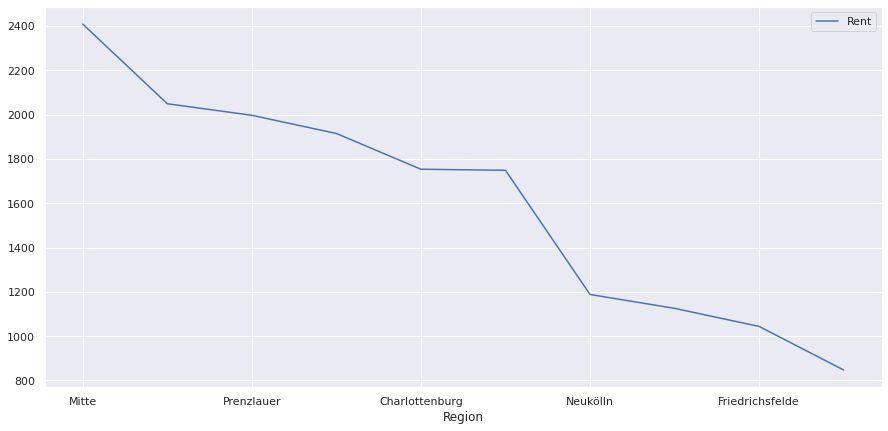

In [ ]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize = (15, 7))
Group.plot(ax = ax);

# A few companies are exploring Apartment renovation as a viable business model — what impact could this practice have in the availability of affordable apartments?

In [ ]:
df["Condition"].unique()

array(['first_time_use', 'well_kept', 'mint_condition', 'no_information',
       'fully_renovated', 'first_time_use_after_refurbishment',
       'refurbished', 'modernized', 'need_of_renovation'], dtype=object)

In [ ]:
df_dummy = pd.get_dummies(df["Condition"])
df_dummy

,first_time_use,first_time_use_after_refurbishment,fully_renovated,mint_condition,modernized,need_of_renovation,no_information,refurbished,well_kept
0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
759,0,0,0,1,0,0,0,0,0
760,0,0,0,1,0,0,0,0,0
761,0,0,0,1,0,0,0,0,0
762,0,0,0,0,0,0,0,0,1


In [ ]:
df_dummy = pd.concat([df, df_dummy], axis = 1)
df_dummy

,Region,Condition,Rooms,Rent,Year_Construction,Space,first_time_use,first_time_use_after_refurbishment,fully_renovated,mint_condition,modernized,need_of_renovation,no_information,refurbished,well_kept
0,Mitte,first_time_use,4.0,2659.00,2019,117.20,1,0,0,0,0,0,0,0,0
1,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33,1,0,0,0,0,0,0,0,0
2,Köpenick,well_kept,2.0,979.00,1997,83.61,0,0,0,0,0,0,0,0,1
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18,0,0,0,0,0,0,0,0,1
4,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,Wedding,mint_condition,1.0,959.00,2017,27.80,0,0,0,1,0,0,0,0,0
760,Wedding,mint_condition,1.0,649.00,2017,20.50,0,0,0,1,0,0,0,0,0
761,Wilmersdorf,mint_condition,4.0,2750.00,2017,110.00,0,0,0,1,0,0,0,0,0
762,Köpenick,well_kept,2.0,1259.00,2017,91.20,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
x = df_dummy.drop(["Condition", "Rent", "need_of_renovation", "Region", "Year_Construction", "Rooms"], axis = "columns")
x

,Space,first_time_use,first_time_use_after_refurbishment,fully_renovated,mint_condition,modernized,no_information,refurbished,well_kept
0,117.20,1,0,0,0,0,0,0,0
1,29.33,1,0,0,0,0,0,0,0
2,83.61,0,0,0,0,0,0,0,1
3,171.18,0,0,0,0,0,0,0,1
4,88.27,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
759,27.80,0,0,0,1,0,0,0,0
760,20.50,0,0,0,1,0,0,0,0
761,110.00,0,0,0,1,0,0,0,0
762,91.20,0,0,0,0,0,0,0,1


In [ ]:
y = df_dummy.Rent
y

0      2659.00
1      1200.00
2       979.00
3      1830.22
4      2272.00
        ...   
759     959.00
760     649.00
761    2750.00
762    1259.00
763     888.00
Name: Rent, Length: 764, dtype: float64

In [ ]:
model.fit(x, y)

LinearRegression()

In [ ]:
Reg1 = ols("y ~ x", df_dummy).fit()
Reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     287.9
Date:                Mon, 02 May 2022   Prob (F-statistic):          4.57e-237
Time:                        17:36:51   Log-Likelihood:                -5877.4
No. Observations:                 764   AIC:                         1.177e+04
Df Residuals:                     754   BIC:                         1.182e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -598.9065    268.236     -2.233      0.026   -1125.485     -72.328
x[0]          21.3427      0.443     48.137      0.000      20.472      22.213
x[1]         673.4106    269.295      2.501      0.013     144.753    1202.068
x[2]         322.1515    282.251      1.141      0.254    -231.940     876.243
x[3]         465.1070    282.277      1.648      0.100     -89.035    1019.249
x[4]         732.5957    271.244      2.701      0.007     200.112    1265.079
x[5]         139.8572    285.019      0.491      0.624    -419.667     699.382
x[6]         495.0198    271.974      1.820      0.069     -38.897    1028.937
x[7]        1002.5071    280.332      3.576      0.000     452.183    1552.831
x[8]         154.1187    272.721      0.565      0.572    -381.265     689.502
==============================================================================
Omnibus:                      568.698   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15718.474
Skew:                           3.033   Prob(JB):                         0.00
Kurtosis:                      24.377   Cond. No.                     3.98e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# It will increase the percentage of  appartments shortages as apartments in apartments which are now renovated will become more expensive

In [ ]:
model.score(x, y)

0.7745681990278482